In [1]:
import cv2
import numpy as np
import pandas as pd
from ultralytics import YOLO
from tracker import Tracker
from detector import Detector
from teams import TeamAffiliation
from keypoint_detector import KeypointDetector
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import utils
from player_position import PlayerPosition

In [2]:
model = YOLO("runs/detect/train38/weights/best.pt")
model_keypoints = YOLO("runs/pose/train9/weights/best.pt")
detector = Detector(model, 0.5)
keypoint_detector = KeypointDetector(model_keypoints)
tracker = Tracker(detector)
positions = PlayerPosition()

In [3]:
video_path = r"C:\Users\Marcin\Videos\ganzgut.mp4"
frames = utils.load_frames(video_path)

In [ ]:
tracks = tracker.track(frames)

In [ ]:
keypoints = keypoint_detector.get_keypoints(frames) 

In [6]:
player_positions = positions.get_players_position(keypoints, tracks)

In [7]:
teams = TeamAffiliation(tracks, frames)

In [8]:
player_teams = teams.get_teams()

In [9]:
# pitch = Pitch(pitch_type='custom', axis=True, label=True, pitch_length=105, pitch_width=68)
# fig, ax = pitch.draw()
# scatter = pitch.scatter(player_positions[1][:, 0], player_positions[1][:, 1], ax=ax, edgecolor="black", c = player_teams[1])
# plt.grid()

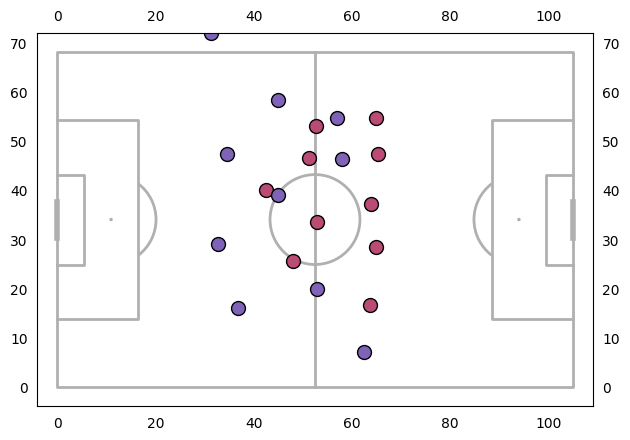

In [10]:
from matplotlib import animation
pitch = Pitch(pitch_type='custom', axis=True, label=True, pitch_length=105, pitch_width=68)
fig, ax = pitch.draw()
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
away, = ax.plot([], [], ms=10, markerfacecolor='#b94b75', **marker_kwargs)
home, = ax.plot([], [], ms=10, markerfacecolor='#7f63b8', **marker_kwargs)

def animate(i):
    frame_postions = player_positions[i]
    fame_teams = player_teams[i]
    home_positions = frame_postions[fame_teams == np.int32(0)]
    away_positions = frame_postions[fame_teams == np.int32(1)]
    home.set_data(home_positions[:, 0], home_positions[:, 1])
    away.set_data(away_positions[:, 0], away_positions[:, 1])
    return home, away
    
ani = animation.FuncAnimation(fig, animate, frames=len(player_positions), interval=100, blit=True)
plt.show()

In [11]:
plt.rcParams['animation.ffmpeg_path'] = ''

In [14]:
ani.save('animation.mp4', fps=30)

In [16]:
dict_to_save = {'frame': [], 'track_id': [], 'x': [], 'y': [], 'team': []}
for i, frame in enumerate(player_positions):
    for j, player in enumerate(frame):
        dict_to_save['frame'].append(i)
        dict_to_save['track_id'].append(j)
        dict_to_save['x'].append(player[0])
        dict_to_save['y'].append(player[1])
        dict_to_save['team'].append(player_teams[i][j])

In [21]:
pd.DataFrame(dict_to_save).to_csv('positions.csv')